In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data using pandas
df= pd.read_csv("C:\\Users\\Admin\\Desktop\\spark_project\\data\\train_set.csv")

In [8]:
# Vérification des valeurs nulles dans chaque feature
null_counts = df.isnull().sum()

# Affichage des résultats pour les colonnes avec des valeurs nulles
print("Valeurs nulles par colonne :")
print(null_counts[null_counts > 0])  # Affiche uniquement les colonnes avec des valeurs nulles

# Nombre total de valeurs nulles dans le dataset
total_nulls = null_counts.sum()
print(f"\nNombre total de valeurs nulles dans le dataset : {total_nulls}")



Valeurs nulles par colonne :
Series([], dtype: int64)

Nombre total de valeurs nulles dans le dataset : 0


In [6]:

# Définir un format global pour l'affichage des floats
pd.options.display.float_format = '{:.4f}'.format

# Calcul de corrélation de Pearson entre chaque variable et TTE
correlation_with_TTE = df.corrwith(df['TTE'])

# Afficher les résultats
print("Corrélation de chaque variable avec TTE :\n")
print(correlation_with_TTE)


Corrélation de chaque variable avec TTE :

Unit number              0.0788
Time (in cycles)        -0.7362
Operational setting 1   -0.0032
Operational setting 2   -0.0019
Operational setting 3       NaN
Sensor measurement 1        NaN
Sensor measurement 2    -0.6065
Sensor measurement 3    -0.5845
Sensor measurement 4    -0.6789
Sensor measurement 5    -0.0000
Sensor measurement 6    -0.1283
Sensor measurement 7     0.6572
Sensor measurement 8    -0.5640
Sensor measurement 9    -0.3901
Sensor measurement 10       NaN
Sensor measurement 11   -0.6962
Sensor measurement 12    0.6720
Sensor measurement 13   -0.5626
Sensor measurement 14   -0.3068
Sensor measurement 15   -0.6427
Sensor measurement 16   -0.0000
Sensor measurement 17   -0.6062
Sensor measurement 18       NaN
Sensor measurement 19       NaN
Sensor measurement 20    0.6294
Sensor measurement 21    0.6357
TTE                      1.0000
dtype: float64


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\Admin\AppData\Local\Temp\ipykernel_21032\689058220.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_TTE.values, y=correlation_with_TTE.index, palette="coolwarm")


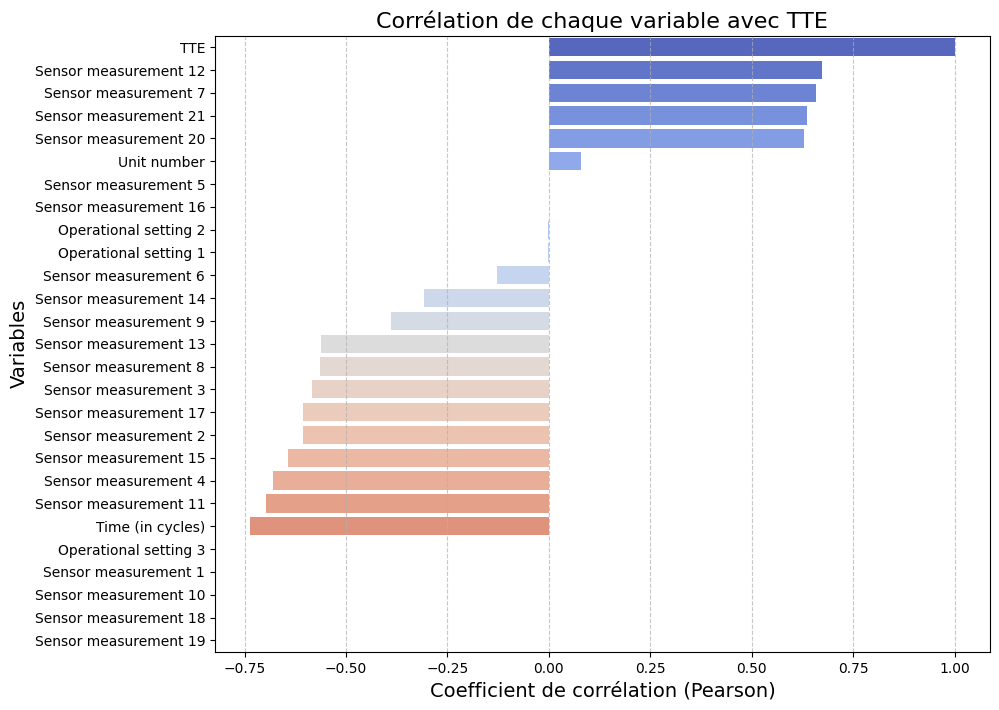

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de corrélation de Pearson entre chaque variable et TTE
correlation_with_TTE = df.corrwith(df['TTE']).sort_values(ascending=False)

# Création d'un bar plot pour visualiser les corrélations
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_TTE.values, y=correlation_with_TTE.index, palette="coolwarm")

# Ajout des titres et labels
plt.title('Corrélation de chaque variable avec TTE', fontsize=16)
plt.xlabel('Coefficient de corrélation (Pearson)', fontsize=14)
plt.ylabel('Variables', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [24]:
# Calcul des corrélations entre chaque feature et TTE
correlation_with_TTE = df.corrwith(df['TTE'])

# Filtrer les features avec une valeur absolue de corrélation > 0.5
high_corr_features = correlation_with_TTE[correlation_with_TTE.abs() > 0.5]

# Supprimer 'Time (in cycles)' et 'Unit number' de la liste des features
features_to_keep = high_corr_features.index.difference(['Time (in cycles)', 'Unit number'])

# Extraire ces features du DataFrame (et ajouter 'TTE' si nécessaire pour l'analyse)
filtered_df = df[features_to_keep.tolist()]

# Afficher les résultats
print(f"Features avec une valeur absolue de corrélation > 0.5 (sans 'Time (in cycles)' et 'Unit number') :\n{features_to_keep}\n")
print(f"DataFrame filtré :\n{filtered_df.head()}")



Features avec une valeur absolue de corrélation > 0.5 (sans 'Time (in cycles)' et 'Unit number') :
Index(['Sensor measurement 11', 'Sensor measurement 12',
       'Sensor measurement 13', 'Sensor measurement 15',
       'Sensor measurement 17', 'Sensor measurement 2',
       'Sensor measurement 20', 'Sensor measurement 21',
       'Sensor measurement 3', 'Sensor measurement 4', 'Sensor measurement 7',
       'Sensor measurement 8', 'TTE'],
      dtype='object')

DataFrame filtré :
   Sensor measurement 11  Sensor measurement 12  Sensor measurement 13  \
0                47.4700               521.6600              2388.0200   
1                47.4900               522.2800              2388.0700   
2                47.2700               522.4200              2388.0300   
3                47.1300               522.8600              2388.0800   
4                47.2800               522.1900              2388.0400   

   Sensor measurement 15  Sensor measurement 17  Sensor measurement 2

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


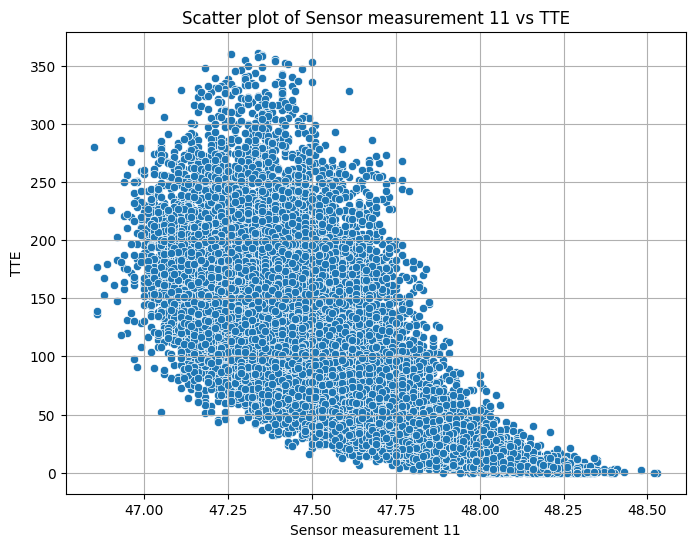

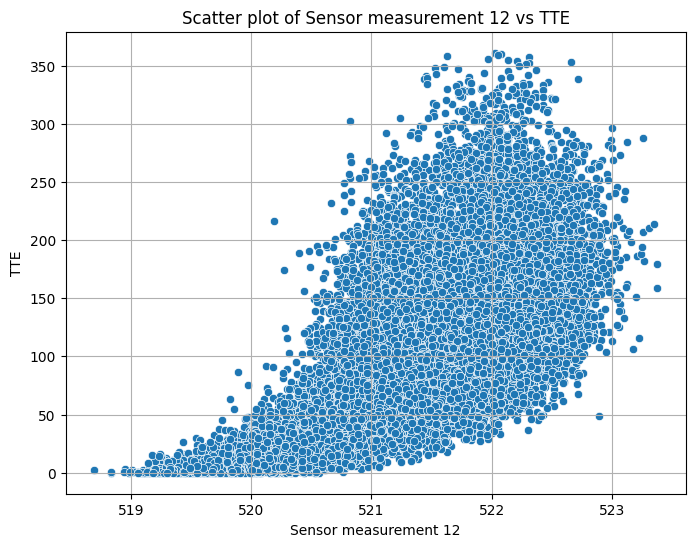

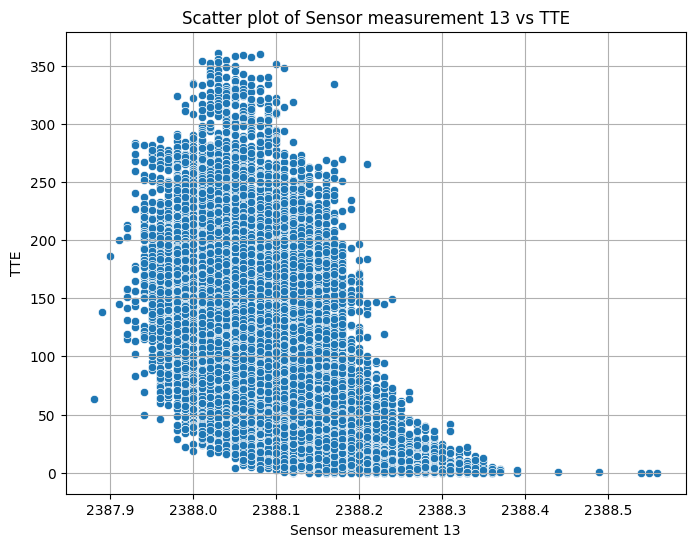

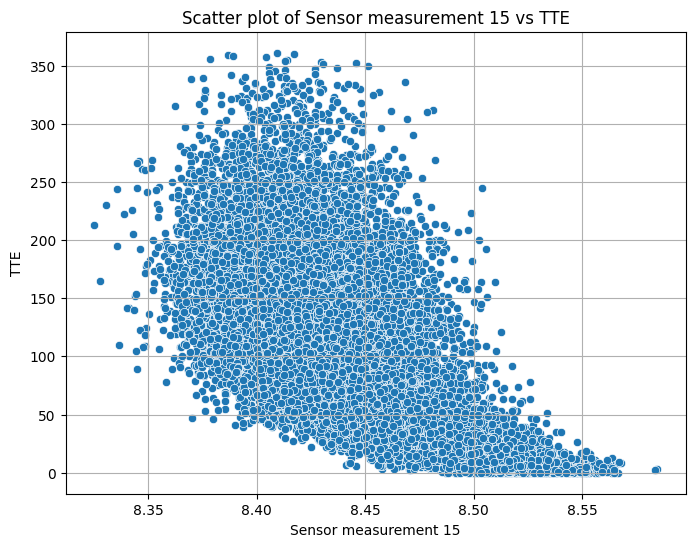

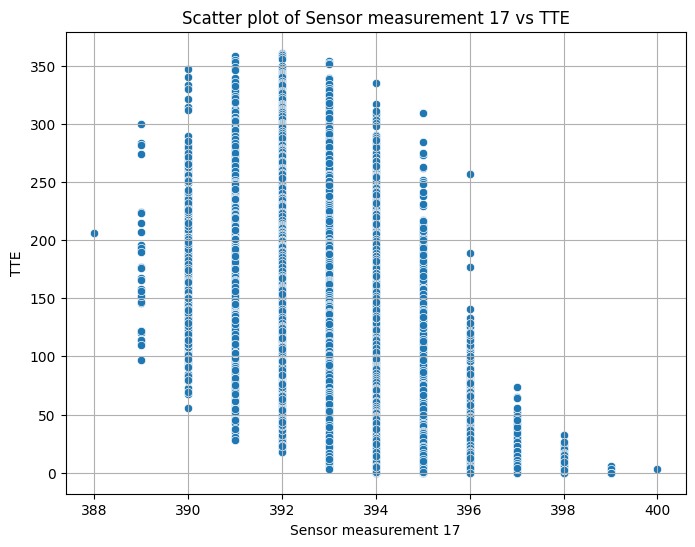

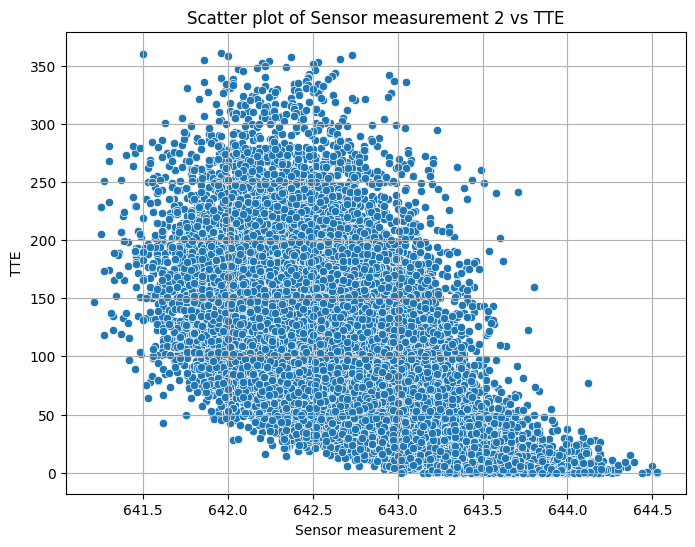

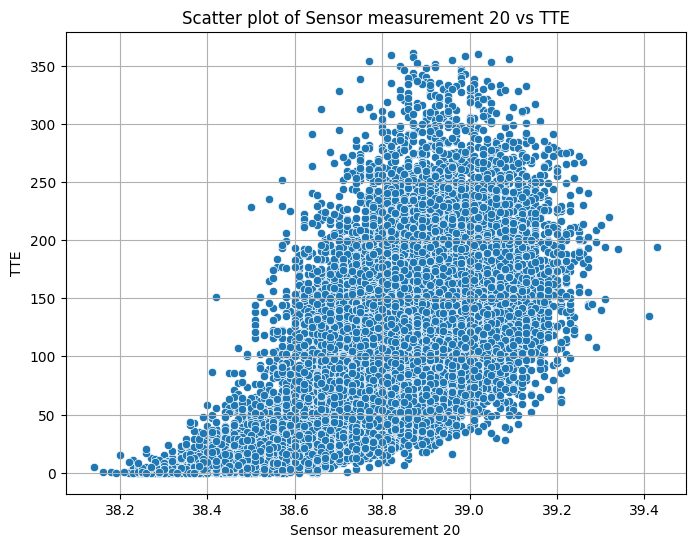

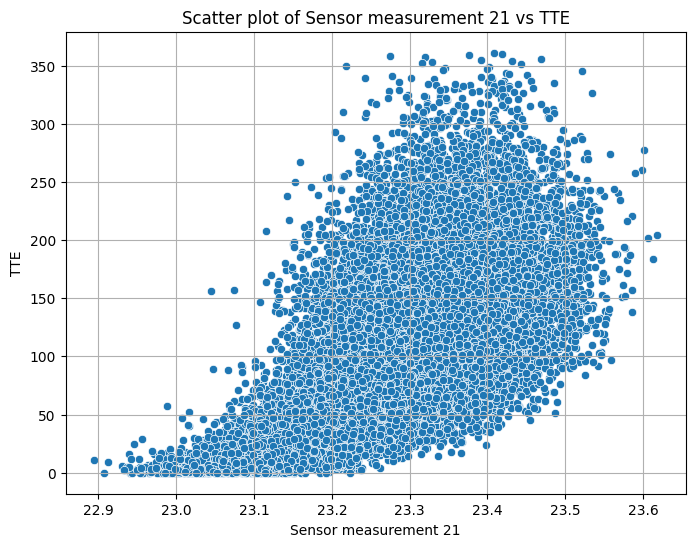

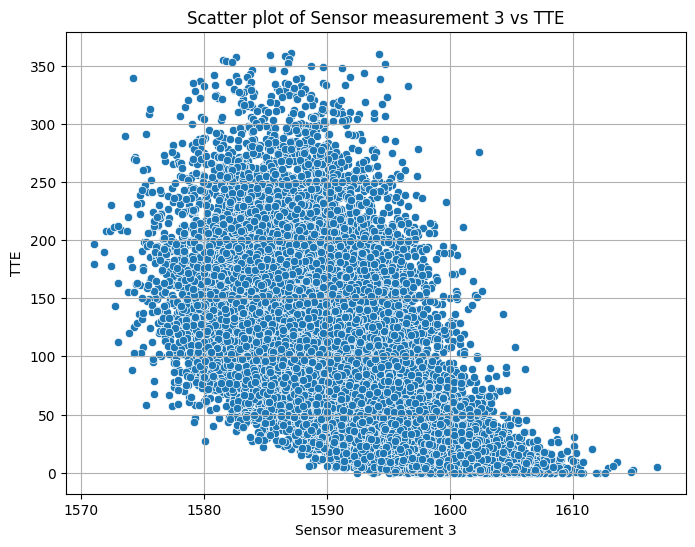

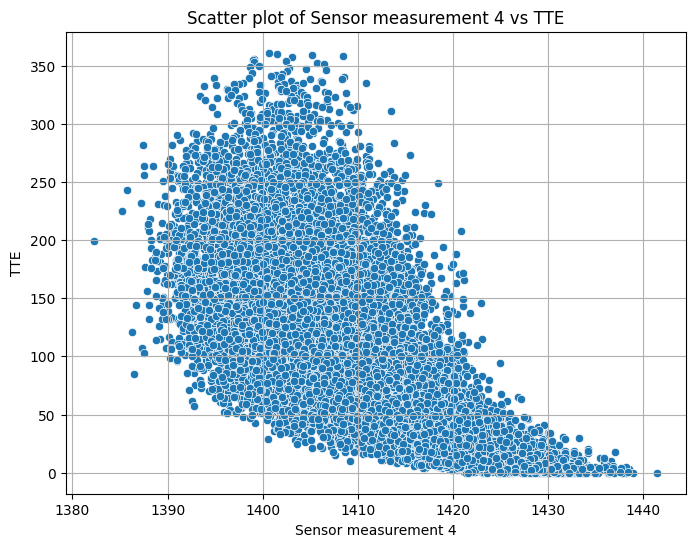

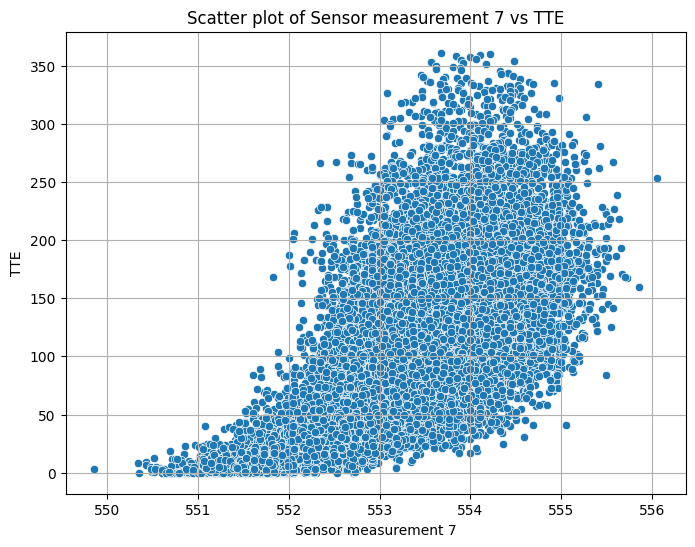

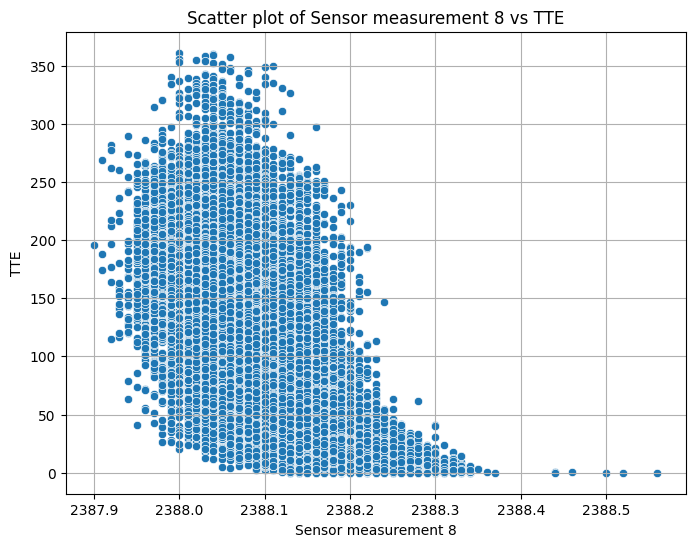

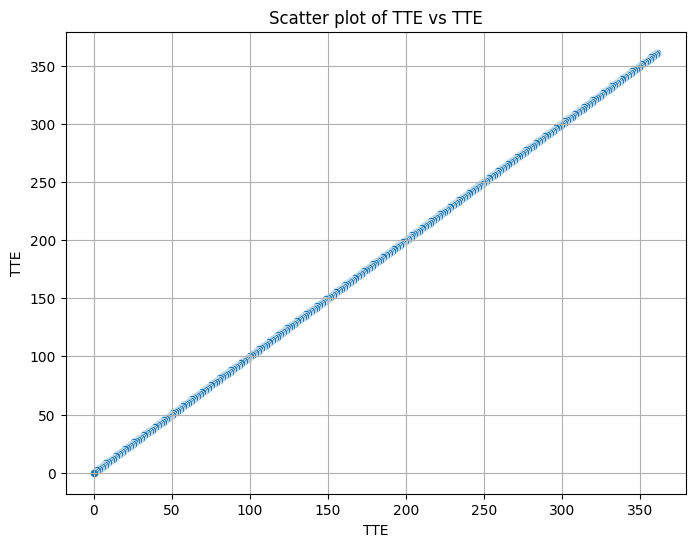

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des features
features_to_keep 

# Création des scatter plots pour chaque feature
for feature in features_to_keep :
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df['TTE'])
    plt.title(f'Scatter plot of {feature} vs TTE')
    plt.xlabel(feature)
    plt.ylabel('TTE')
    plt.grid(True)
    plt.show()


In [27]:
import os

# Spécifier le chemin absolu vers le répertoire de destination
directory = r'C:\Users\Admin\Desktop\spark_project\data'

# Sauvegarder les features sélectionnées dans un fichier Excel, en excluant la colonne "TTE"
filtered_df.to_excel(os.path.join(directory, 'selected_features.xlsx'), index=False)

print("Le fichier 'selected_features.xlsx' a été généré avec succès dans le répertoire 'data'.")


Le fichier 'selected_features.xlsx' a été généré avec succès dans le répertoire 'data'.


In [ ]:
# Nombre total de lignes pour chaque colonne
total_rows_per_column = filtered_df.count()

# Nombre de valeurs nulles pour chaque colonne
null_values_per_column = filtered_df.isnull().sum()

# Affichage des résultats
print("Nombre total de lignes non-nulles par colonne :")
print(total_rows_per_column)

print("\nNombre de valeurs nulles par colonne :")
print(null_values_per_column)

# Nombre total de lignes dans le DataFrame
total_rows = len(filtered_df)
print(f"\nNombre total de lignes dans le dataset : {total_rows}")

[Sensor measurement 11    20631
Sensor measurement 12    20631
Sensor measurement 13    20631
Sensor measurement 15    20631
Sensor measurement 17    20631
Sensor measurement 2     20631
Sensor measurement 20    20631
Sensor measurement 21    20631
Sensor measurement 3     20631
Sensor measurement 4     20631
Sensor measurement 7     20631
Sensor measurement 8     20631]


Nombre total de lignes non-nulles par colonne :
Sensor measurement 11    20631
Sensor measurement 12    20631
Sensor measurement 13    20631
Sensor measurement 15    20631
Sensor measurement 17    20631
Sensor measurement 2     20631
Sensor measurement 20    20631
Sensor measurement 21    20631
Sensor measurement 3     20631
Sensor measurement 4     20631
Sensor measurement 7     20631
Sensor measurement 8     20631
TTE                      20631
dtype: int64

Nombre de valeurs nulles par colonne :
Sensor measurement 11    0
Sensor measurement 12    0
Sensor measurement 13    0
Sensor measurement 15    0
Sensor measurement 17    0
Sensor measurement 2     0
Sensor measurement 20    0
Sensor measurement 21    0
Sensor measurement 3     0
Sensor measurement 4     0
Sensor measurement 7     0
Sensor measurement 8     0
TTE                      0
dtype: int64

Nombre total de lignes dans le dataset : 20631
